<a href="https://colab.research.google.com/github/Xerconia/Transitlytics/blob/main/hisa_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and view data

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
hh = pd.read_csv("dataset/hhv2pub.csv")
ldt = pd.read_csv("dataset/ldtv2pub.csv")
per = pd.read_csv("dataset/perv2pub.csv")
trip = pd.read_csv("dataset/tripv2pub.csv")
veh = pd.read_csv("dataset/vehv2pub.csv")

In [3]:
""" print(hh)
print(ldt)
print(per)
print(trip)
print(veh) """


' print(hh)\nprint(ldt)\nprint(per)\nprint(trip)\nprint(veh) '

Question: Of the total trips between 0-3 miles, what percent is done by walking, biking, public transit, or personal vehicle? How about trips of 3-10 miles or 10+ miles?

In [16]:
#trpmiles, trptrans
#avg trip miles by transportation mode

#select variables of interest
trp_sel = trip[["TRPMILES","TRPTRANS"]]
trp_sel

#group trip miles by mode and take avg of miles
trp_grp = trp_sel.groupby("TRPTRANS").mean()
trp_grp

,TRPMILES
TRPTRANS,
1,10.930488
2,10.633207
3,13.027771
4,14.374607
6,69.428776
7,8.702333
8,6.590010
9,5.861167
10,5.147089


#to do: visualize
https://python-graph-gallery.com/

Question: Does certain (zip codes -> people with higher incomes) tend to have more personal vehicle use for their daily trips?

In [45]:
inc_mapping_series = pd.Series({-7: r"I prefer not to answer",
                            -8: r"I don't know", 
                            1: r"01 - Less than \$10,000", 
                            2: r"02 - \$10,000 - \$14,999",
                            3: r"03 - \$15,000 - \$24,999",
                            4: r"04 - \$25,000 - \$34,999",
                            5: r"05 - \$35,000 - \$49,999",
                            6: r"06 - \$50,000 - \$74,999",
                            7: r"07 - \$75,000 - \$99,999",
                            8: r"08 - \$100,000 - \$124,999",
                            9: r"09 - \$125,000 - \$149,999",
                            10: r"10 - \$150,000 - \$199,999",
                            11: r"11 - \$200,000 or more"
                            })
trip['HHFAMINC_label'] = trip['HHFAMINC'].replace(inc_mapping_series)
#print(trip)

trans_mapping_series = pd.Series({1: "Car", 
                            2: "Van",
                            3: "SUV/Crossover",
                            4: "Pickup truck",

                            6: "Recreational Vehicle",
                            7: "Motorcycle",
                            8: "Public or commuter bus",
                            9: "School bus",
                            10: "Street car or trolley car",
                            11: "Subway or elevated rail",
                            12: "Commuter rail",
                            13: "Amtrak",
                            14: "Airplane",
                            15: "Taxicab or limo service",
                            16: "Other ride-sharing service",
                            17: "Paratransit/ Dial a ride",
                            18: "Bicycle (including bikeshare, ebike, etc.)",
                            19: "E-scooter",
                            20: "Walked",
                            21: "Other (specify)"
                            })
trip['TRPTRANS_label'] = trip['TRPTRANS'].replace(trans_mapping_series)


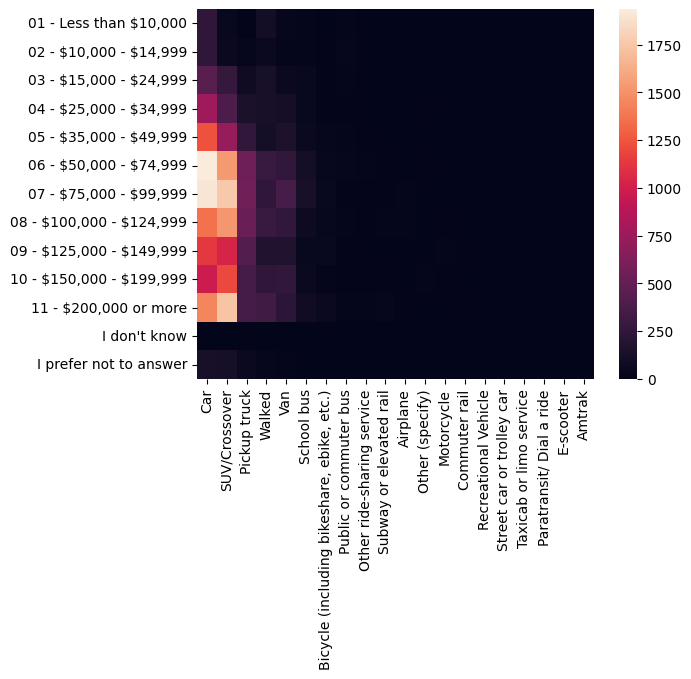

In [51]:
# Creating crosstab
crosstb = pd.crosstab(trip.HHFAMINC_label, trip.TRPTRANS_label).sort_index(axis = 0)
crosstb_ord = crosstb[crosstb.sum().sort_values(ascending=False).index]

# Heatmap
heatmap = sns.heatmap(crosstb_ord.rename_axis(index=None, columns=None))

Does this vary by whether the household is urban/rural?

In [53]:
#split into two datasets
urban = trip[trip["URBRUR"] == 1]

rural = trip[trip["URBRUR"] == 2]

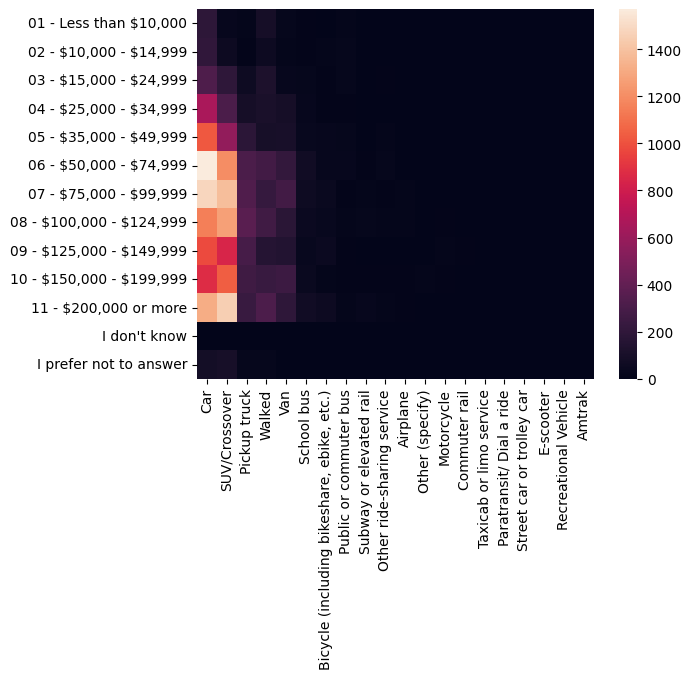

In [54]:
#Urban
# Creating crosstab
ucrosstb = pd.crosstab(urban.HHFAMINC_label, urban.TRPTRANS_label).sort_index(axis = 0)
ucrosstb_ord = ucrosstb[ucrosstb.sum().sort_values(ascending=False).index]
#print(ucrosstb)

# Heatmap
uheatmap = sns.heatmap(ucrosstb_ord.rename_axis(index=None, columns=None))

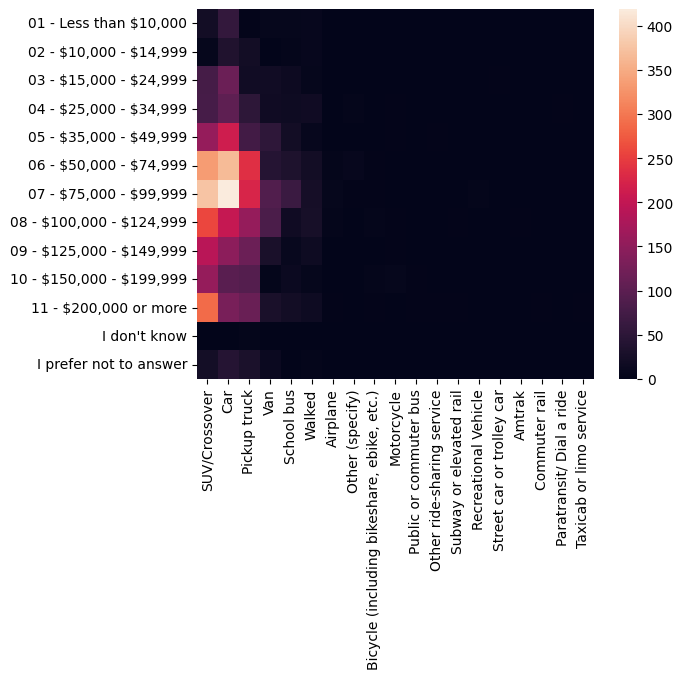

In [55]:
#Rural
# Creating crosstab
rcrosstb = pd.crosstab(rural.HHFAMINC_label, rural.TRPTRANS_label).sort_index(axis = 0)
rcrosstb_ord = rcrosstb[rcrosstb.sum().sort_values(ascending=False).index]
#print(rcrosstb)

# Heatmap
rheatmap = sns.heatmap(rcrosstb_ord.rename_axis(index=None, columns=None))